# Get Latitude and Longitude from Pincode

In [13]:
import requests
import json
import pandas as pd
import numpy as np
import geopy as gd
from geopy.distance import geodesic
PinData_file= pd.read_excel('Locality_Pincode.xlsx')

### Enter the Pincode Here:

In [23]:
#ENTER PINCODE between 140001 and 160104
#Download full Dataset :- https://data.gov.in/catalog/locality-based-pincode
pinlist= int(input(' Enter the Pincodes here: '))

 Enter the Pincodes here: 142047


In [24]:
PinData=PinData_file[ PinData_file['Pincode']==pinlist]
PinData['Districtname'].value_counts()

FIROZPUR    48
Name: Districtname, dtype: int64

### Get Latitude and Longitude from Localities

In [25]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")
place_li = []
place_l = []
district_l= []
lat_l = []
long_l= []
place_list = list(PinData['Locality'])
district_list= list(PinData['Districtname'])
for i in range(0,len(place_list)):
    url= place_list[i]+" "+district_list[i]
    location = geolocator.geocode(url)
    try:
        
        address = location[0].split(',')
        place_li.append(place_list[i])
        place_l.append(address[0])
        district_l.append(address[2])
        lat_l.append(location.latitude)
        long_l.append(location.longitude)
    except:
        continue               

### Create Dataframe to Store Latitude and Longitude

In [26]:
place_cord= pd.DataFrame()
place_cord['Locality']=place_li
place_cord['Place']=place_l
place_cord['District']=district_l
place_cord['Latitude']=lat_l
place_cord['Longitude']=long_l

# Create Clusters to identify outliers

In [27]:
import seaborn as ss
import matplotlib.pyplot as plt
import numpy as nn
from sklearn.cluster import KMeans
x= place_cord.iloc[:,[3,4]].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++',max_iter = 300, n_init = 2, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0])

In [28]:
c1=kmeans.cluster_centers_[0]
c2=kmeans.cluster_centers_[1]

In [29]:
place_cord['Cluster']=y_kmeans
place_cord_clus =place_cord[ place_cord['Cluster']==0]
place_cord_clus

,Locality,Place,District,Latitude,Longitude,Cluster
0,Alipur,Alipur,Firozpur,31.008915,74.899319,0
1,Dhandian,Dhandian,Firozpur,31.023827,74.951697,0
2,Lohke Kalan,Lohke Kalan,Firozpur,31.050935,74.924676,0
3,Marur,Marur,Firozpur,30.963306,74.864273,0
4,Santuwala,Santu Wala,Firozpur,31.004901,74.940745,0
5,Valtoha,Waltoha,Firozpur,31.010550,74.884223,0
6,Chuchak Wind,CHUCHAK WIND,Firozpur,30.977339,74.869664,0
7,Bahawalpur,Bahawalpur,Firozpur,31.029535,75.009193,0
8,Basti Bute Wali,Basti Bute Wali,Zira Tahsil,31.021988,74.983966,0
10,Zira Nau,Zira Nau,Firozpur,30.994520,74.974461,0


In [30]:
place_cord_clus1 =place_cord[ place_cord['Cluster']==1]
place_cord_clus1

,Locality,Place,District,Latitude,Longitude,Cluster
9,Machhiwara,Machhiwara,Firozpur,30.824200,74.520235,1
16,Basti Punjab singh wali,Dhir Hospital,ODR20,30.962612,74.616913,1
21,Malsian,Malsian,Firozpur,30.807162,74.402225,1
22,Nurpur,Nurpur,Firozpur,30.875045,74.637422,1


### Draw Scatter Plot for places

The Center of Pincode is 30.937261414285715  74.74414391143284


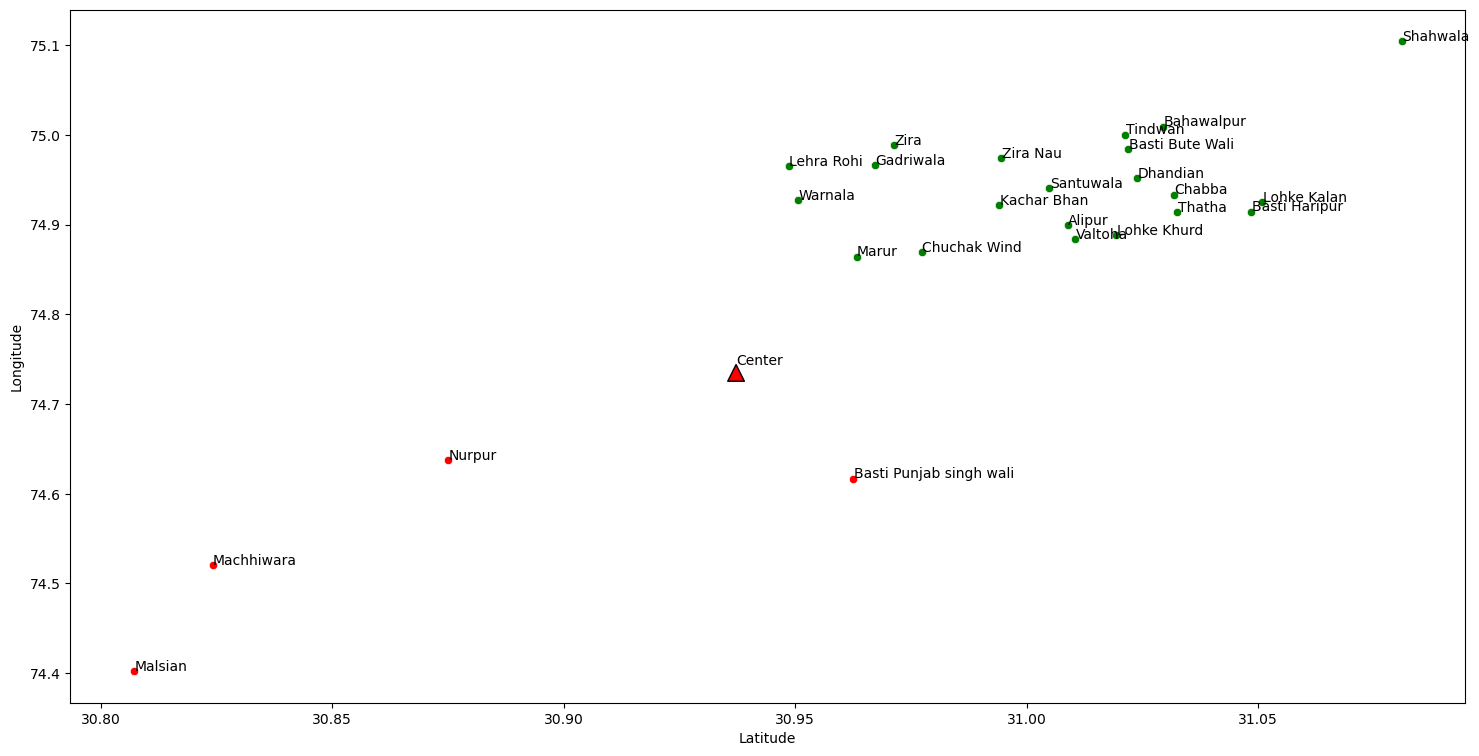

In [31]:
plt.figure(figsize=(18,9))
ss.scatterplot(x='Latitude',y='Longitude',data=place_cord,color='red')
ss.scatterplot(x='Latitude',y='Longitude',data=place_cord_clus,color='green')
for i in range(len(place_cord['Locality'])):
    p1= list(place_cord['Locality'])
    p2= list(place_cord['Latitude'])
    p3 =list(place_cord['Longitude'])
    plt.annotate(p1[i],(p2[i]+0.0001,p3[i]+0.0005))
    
if(geodesic((c1[0],c1[1]),(c2[0],c2[1]))>50):
    plt.annotate("Center",(c1[0],c1[1]),arrowprops = dict(facecolor ='green',shrink = 1.5 ))
    plt.annotate("Outliers",(c2[0],c2[1]),arrowprops = dict(facecolor ='red',shrink = 0.05 ))
    
    plt.show()
    print("The Center of Pincode is",c1[0],"",c1[1])
else:
    cc1= (c1[0]+c2[0])/2
    cc2= (c1[1]+c2[1])/2
    plt.annotate("Center",(cc1,cc2),arrowprops = dict(facecolor ='red',shrink = 0.05 ))
    print("The Center of Pincode is",cc1,"",cc2)
    

plt.show()
